In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
train = pd.read_csv('transactions_rosbank.csv')

In [3]:
train

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.00,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.00,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.00,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.00,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.00,C2C_OUT,0,0.0
...,...,...,...,...,...,...,...,...,...,...
490508,01/04/2017,10176,6011,type1,810,24APR17:14:05:26,600.00,WD_ATM_ROS,1,405.0
490509,01/06/2017,10171,5411,type1,810,06JUN17:00:00:00,132.00,POS,0,0.0
490510,01/02/2017,10167,5541,type1,810,03FEB17:00:00:00,1000.00,POS,1,280428.2
490511,01/06/2017,10163,5941,type1,810,08JUN17:00:00:00,100.00,POS,0,0.0


In [4]:
train['date'] = pd.to_datetime(train['TRDATETIME'], format='%d%b%y:%H:%M:%S').dt.date

In [5]:
train

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum,date
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.00,POS,0,0.0,2017-10-21
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.00,DEPOSIT,0,0.0,2017-10-12
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.00,POS,0,0.0,2017-12-05
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.00,POS,0,0.0,2017-10-21
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.00,C2C_OUT,0,0.0,2017-10-24
...,...,...,...,...,...,...,...,...,...,...,...
490508,01/04/2017,10176,6011,type1,810,24APR17:14:05:26,600.00,WD_ATM_ROS,1,405.0,2017-04-24
490509,01/06/2017,10171,5411,type1,810,06JUN17:00:00:00,132.00,POS,0,0.0,2017-06-06
490510,01/02/2017,10167,5541,type1,810,03FEB17:00:00:00,1000.00,POS,1,280428.2,2017-02-03
490511,01/06/2017,10163,5941,type1,810,08JUN17:00:00:00,100.00,POS,0,0.0,2017-06-08


In [6]:
date_agg = train.groupby('date').agg(
    Mean=('amount', np.mean),
    Sum=('amount', np.sum),
    Count_tr = ('amount', len)
    )

In [7]:
date_agg

,Mean,Sum,Count_tr
date,,,
2016-10-07,4076.750000,16307.00,4
2016-10-08,4766.270000,81026.59,17
2016-10-09,815.383333,2446.15,3
2016-10-10,15090.526471,256538.95,17
2016-10-11,18159.635926,490310.17,27
...,...,...,...
2018-03-29,1194.287887,84794.44,71
2018-03-30,4678.980290,322849.64,69
2018-03-31,5194.168630,379174.31,73


Text(0, 0.5, 'Mean amount of transactions')

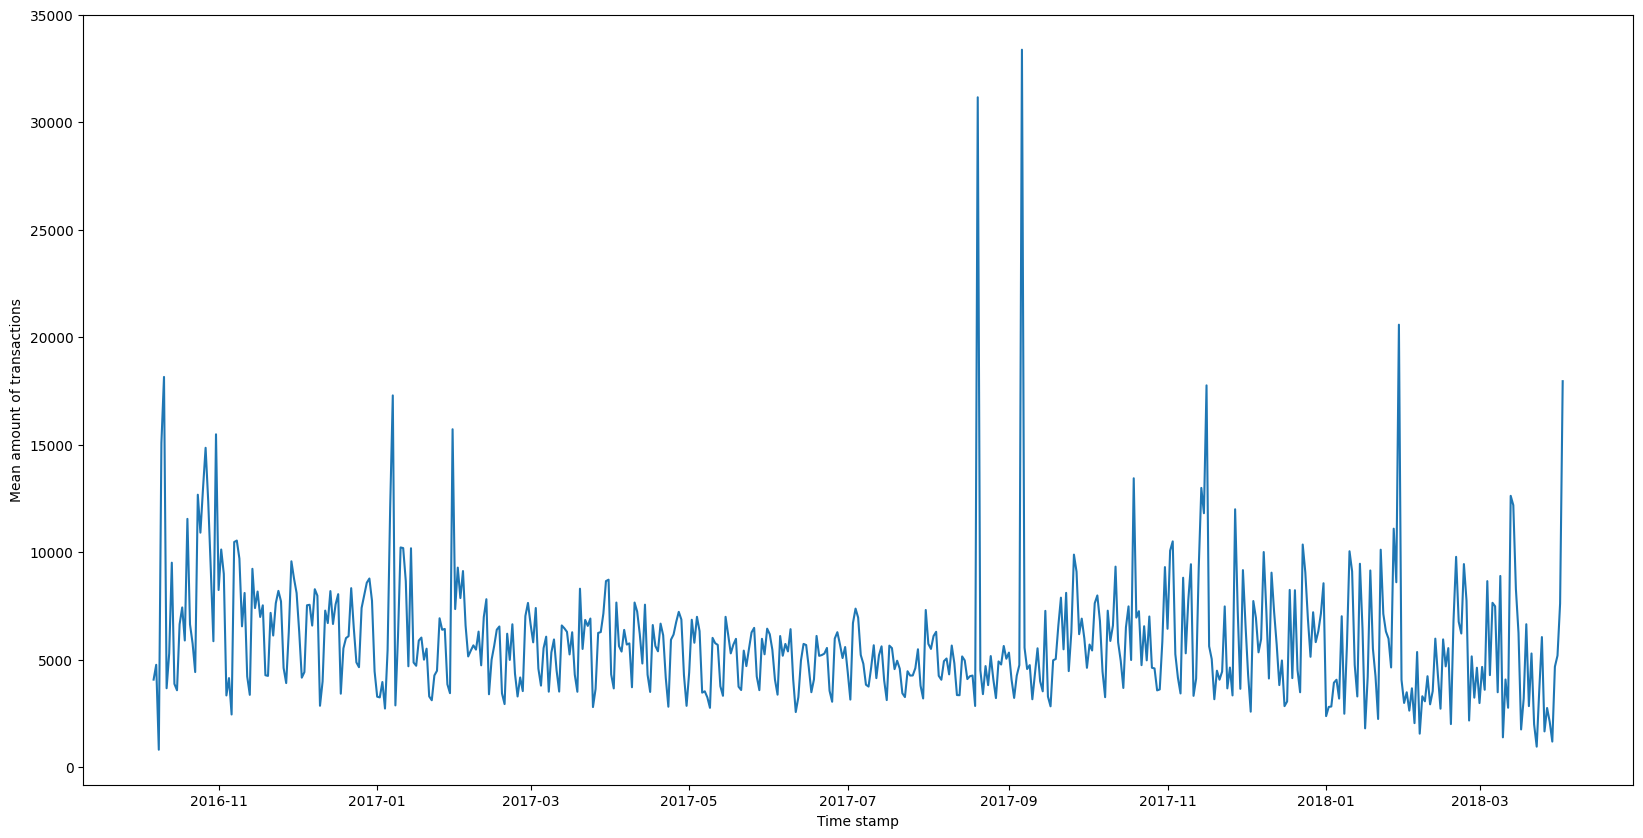

In [8]:
plt.figure(figsize = (20, 10))
plt.plot(date_agg.index, date_agg.Mean)
plt.xlabel('Time stamp')
plt.ylabel('Mean amount of transactions')

Text(0, 0.5, 'Total sum of transactions')

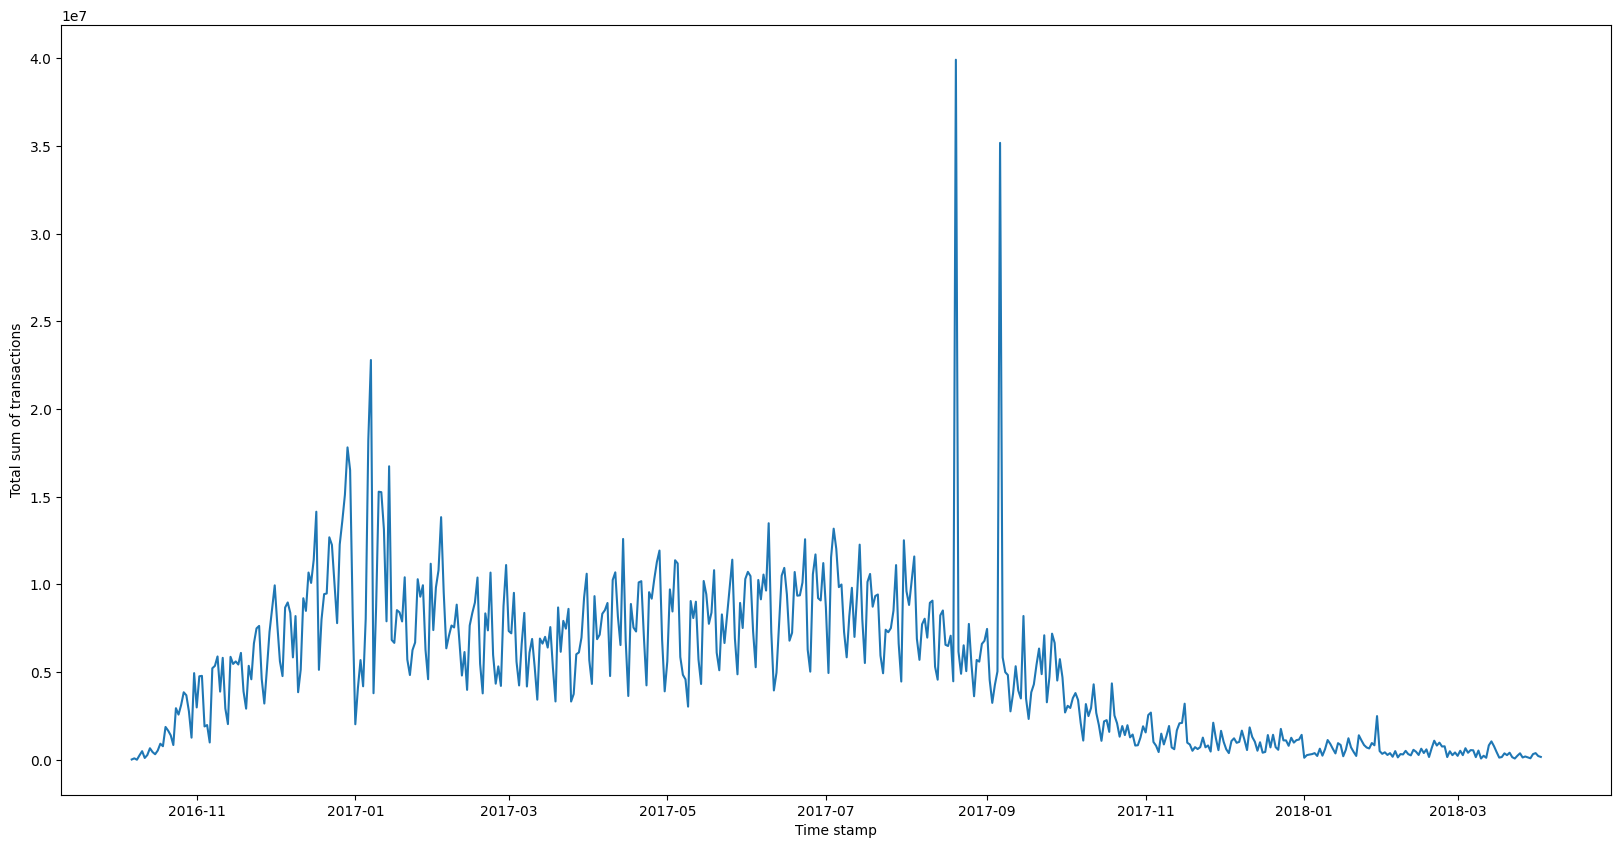

In [9]:
plt.figure(figsize = (20, 10))
plt.plot(date_agg.index, date_agg.Sum)
plt.xlabel('Time stamp')
plt.ylabel('Total sum of transactions')

Text(0, 0.5, 'Total number of transactions')

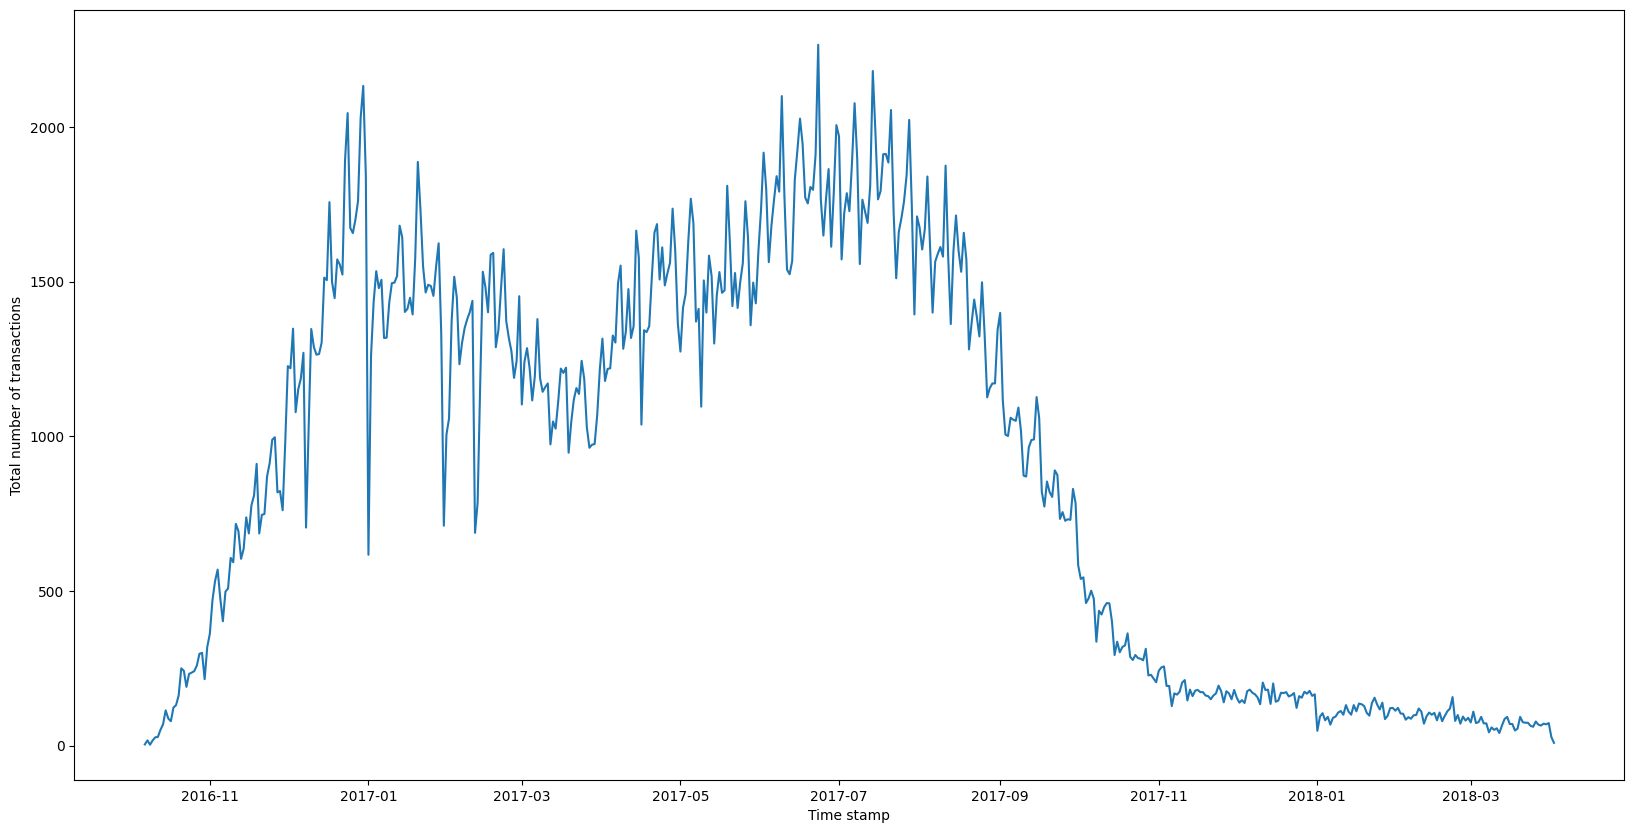

In [10]:
plt.figure(figsize = (20, 10))
plt.plot(date_agg.index, date_agg.Count_tr)
plt.xlabel('Time stamp')
plt.ylabel('Total number of transactions')

In [11]:
groups_agg = train.groupby('MCC').agg(
    Mean=('amount', np.mean),
    Sum=('amount', np.sum),
    Count_tr = ('amount', len)
    )

In [12]:
groups_agg['percent'] = groups_agg.Count_tr/sum(groups_agg.Count_tr)

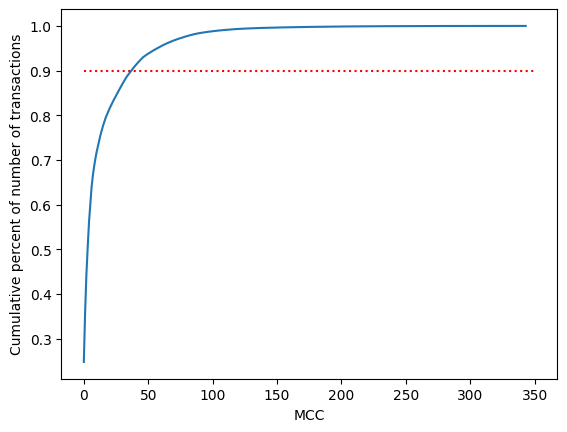

In [13]:
groups_agg.sort_values(by='percent', ascending=False, na_position='first').reset_index().percent.cumsum().plot()
plt.xlabel('MCC')
plt.ylabel('Cumulative percent of number of transactions')
plt.hlines(0.9, 0, 350, 'r', linestyles='dotted')

Enough to take 50 most popular mcc codes to cover 90% of all transaction

In [14]:
clients_agg = train.groupby('cl_id').agg(
    Mean=('amount', np.mean),
    Sum=('amount', np.sum),
    Count_tr = ('amount', len)
    )

In [15]:
clients_agg.Count_tr.min()

1

Clients should be filtered as well

In [16]:
clients_agg['percent_count'] = clients_agg.Count_tr/sum(clients_agg.Count_tr)

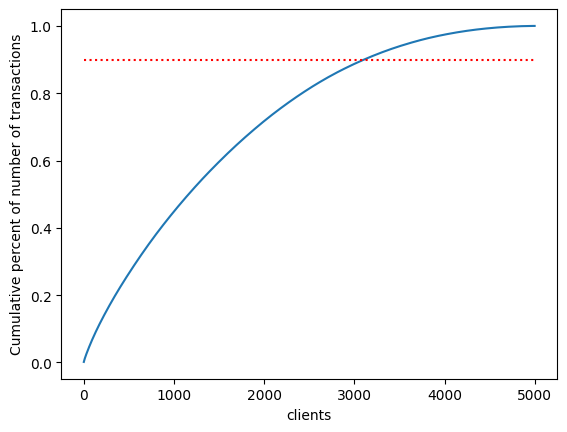

In [17]:
clients_agg.sort_values(by='percent_count', ascending=False, na_position='first').reset_index().percent_count.cumsum().plot()
plt.xlabel('clients')
plt.ylabel('Cumulative percent of number of transactions')
plt.hlines(0.9, 0, 5000, 'r', linestyles='dotted')

Around 4000 clients with the highest number of transaction can be taken to cover 90% of dataset

Text(0.5, 1.0, 'Distribution of length of sequence of transactions of users')

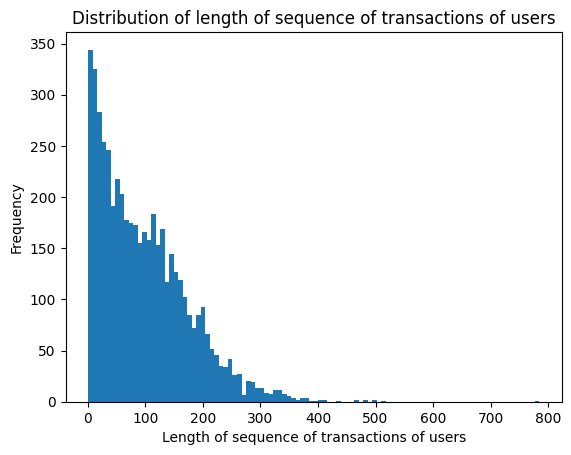

In [29]:
plt.hist(clients_agg.Count_tr, bins = 100)
plt.xlabel('Length of sequence of transactions of users')
plt.ylabel('Frequency')
plt.title('Distribution of length of sequence of transactions of users')

In [27]:
clients_agg['percent'] = clients_agg['Sum']/sum(groups_agg['Sum'])

Text(0.5, 1.0, 'Wealth inequality of clients')

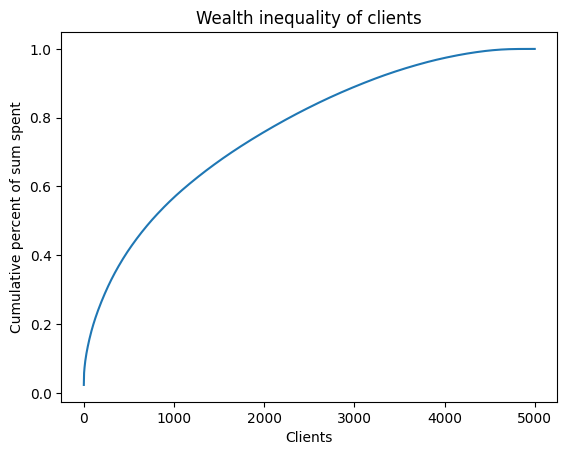

In [28]:
clients_agg.sort_values(by='percent', ascending=False, na_position='first').reset_index().percent.cumsum().plot()
plt.xlabel('Clients')
plt.ylabel('Cumulative percent of sum spent')
plt.title("Wealth inequality of clients")